In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import statistics as stat

## Loop in 2D Random Walk

In [60]:
def walk2d(n): # n = number of steps
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    for i in range(n):
        x1 = x
        y1 = y
        flag = random.randint(0,3)
        if(flag==0):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        else:
            y-=step_len
        x2 = x
        y2 = y
        plt.plot([x1,x2],[y1,y2], color = 'blue')
    return

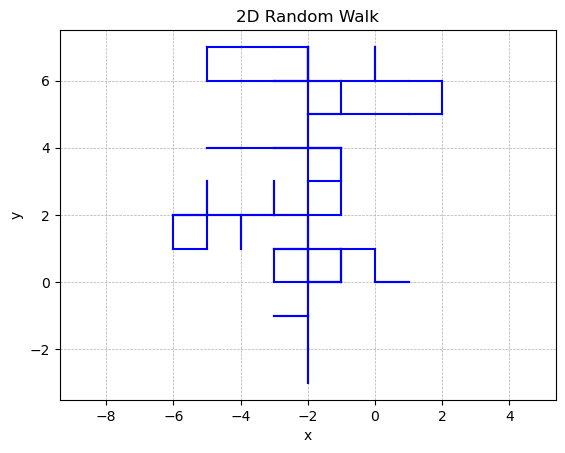

In [63]:
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axis('Equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')
walk2d(100)

In [14]:
class Line:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
    def isSame(self, other):
        if(self.x1==other.x1 and self.y1==other.y1 and self.x2==other.x2 and self.y2==other.y2):
            return True
        elif(self.x2==other.x1 and self.y2==other.y1 and self.x1==other.x2 and self.y1==other.y2):
            return True
        else:
            return False
    def getCoord(self):
        #print((self.x1,self.y1),(self.x2,self.y2))
        return [(self.x1,self.y1),(self.x2,self.y2)]

In [17]:
def loopWalk2d(n): # n = number of steps
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    coord=[(0,0)]
    lines=[]
    counter = 0
    for i in range(n):
        x1 = x
        y1 = y
        flag = random.randint(0,3)
        if(flag==0):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        else:
            y-=step_len
        x2 = x
        y2 = y
        l = Line(x1, y1, x2, y2)
        if((x2,y2) in coord):
            check = False
            for line in lines:
                if(line.isSame(l)):
                    check = True
                    break
            if(check==False):
                counter += 1
        coord.append((x2,y2))
        lines.append(l)
        plt.plot([x1,x2],[y1,y2], color = 'blue')
    return counter, coord, [l.getCoord() for l in lines]

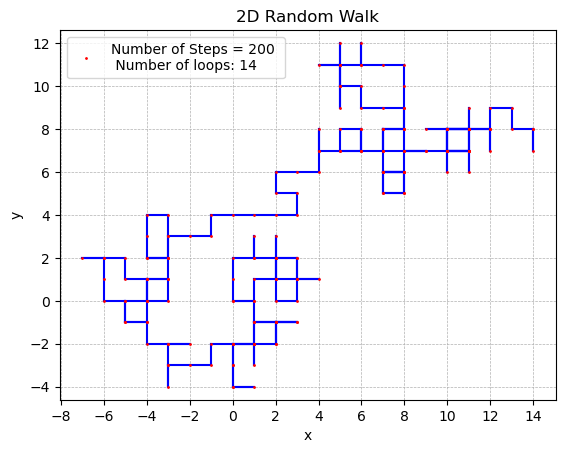

In [35]:
steps = 200
count, coord, lines = loopWalk2d(steps)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(np.arange(-steps/10, steps/10, 2))
plt.yticks(np.arange(-steps/10, steps/10, 2))
plt.plot(*zip(*coord), marker='o', color='red', markersize=1, linestyle='None', label=f"Number of Steps = 200 \n Number of loops: {count}")
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')
plt.legend()
plt.show()

In [64]:
def loopCounter(n): 
    ''' Input: n = number of steps
    Ountput: counter = Number of loops'''
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    coord=[(0,0)]
    lines=[]
    counter = 0
    for i in range(n):
        #coordinates of the starting point of the step
        x1 = x 
        y1 = y
        flag = random.randint(0,3)
        if(flag==0):
            x+=step_len
        elif(flag==1):
            x-=step_len
        elif(flag==2):
            y+=step_len
        else:
            y-=step_len
        #coordinates of the ending point of the step
        x2 = x 
        y2 = y
        #Forms a line
        l = Line(x1, y1, x2, y2)
        # Conditon 1: If the coordinate is a repeat
        if((x2,y2) in coord):
            # Condition 2: If the line existed before
            check = False
            for line in lines:
                if(line.isSame(l)):
                    check = True
                    break
            if(check==False):
                counter += 1
        coord.append((x2,y2))
        lines.append(l)
    return counter

Text(0.5, 1.0, 'Number of Loops vs Number of Steps in 2D Random Walk')

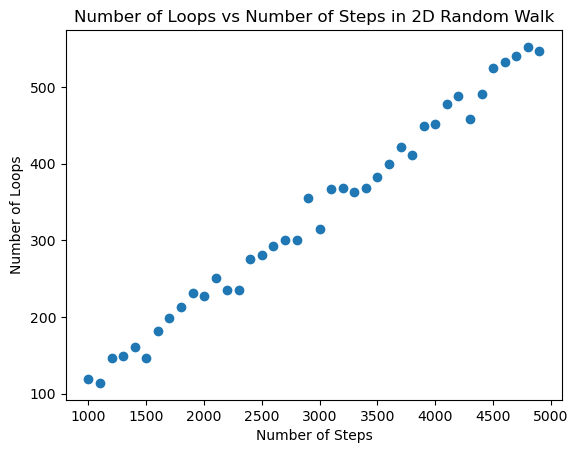

In [40]:
steps = np.arange(1000, 5000, 100)
plt.scatter(steps, [loopCounter(s) for s in steps])
plt.xlabel('Number of Steps')
plt.ylabel('Number of Loops')
plt.title('Number of Loops vs Number of Steps in 2D Random Walk')